<a href="https://colab.research.google.com/github/ttuyetdinh/diveintocode-ml/blob/master/Week%204/Asign16_w4_LearningCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1
What to learn and what to predict? 

=> We learn the way to analysis and statistic the house price dataset, and predict the clients capable of repayment

What kind of file to create and submit to Kaggle?

=> The file containing SK_ID_CURR & TARGET headers.

What kind of index value will be used to evaluate the submissions?

=> For each SK_ID_CURR in the test set, a probability of the TARGET variable is used for evaluating the submission as well as the ROC curve


#Problem 2

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
csv_path1 = "/content/drive/MyDrive/Colab Notebooks/application_train.csv" # Specify the file name (path)
csv_path2 = "/content/drive/MyDrive/Colab Notebooks/application_test.csv" # Specify the file name (path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
dataset_train=pd.read_csv(csv_path1, index_col='SK_ID_CURR')
df_train = dataset_train.drop('TARGET', axis = 1)
df_train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_test=pd.read_csv(csv_path2, index_col='SK_ID_CURR')
df_test.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,0.752614,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,0.564990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,0.525734,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,0.202145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
print('Shape of data: {}' .format(df_train.shape))
df_train.describe()

Shape of data: (307511, 120)


,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.

In [37]:
# basic info of dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 120 entries, NAME_CONTRACT_TYPE to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(39), object(16)
memory usage: 283.9+ MB


In [132]:
#Check miss value
def show_miss(df):
  miss_ratio = df.isnull().mean() * 100
  miss_sum = df.isnull().sum()
  temp=pd.concat([miss_sum,miss_ratio],axis=1).rename(columns={0: 'Miss count', 1: 'Miss ratio'})
  print(f"Number of columns contain miss value: {temp.value_counts().size}")
  temp.sort_values(ascending=False, by= 'Miss ratio')
  print(temp)
show_miss(df_train)

Number of columns contain miss value: 32
                            Miss count  Miss ratio
NAME_CONTRACT_TYPE                   0    0.000000
CODE_GENDER                          0    0.000000
FLAG_OWN_CAR                         0    0.000000
FLAG_OWN_REALTY                      0    0.000000
CNT_CHILDREN                         0    0.000000
...                                ...         ...
AMT_REQ_CREDIT_BUREAU_DAY        41519   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK       41519   13.501631
AMT_REQ_CREDIT_BUREAU_MON        41519   13.501631
AMT_REQ_CREDIT_BUREAU_QRT        41519   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR       41519   13.501631

[120 rows x 2 columns]


<Figure size 1728x1152 with 0 Axes>

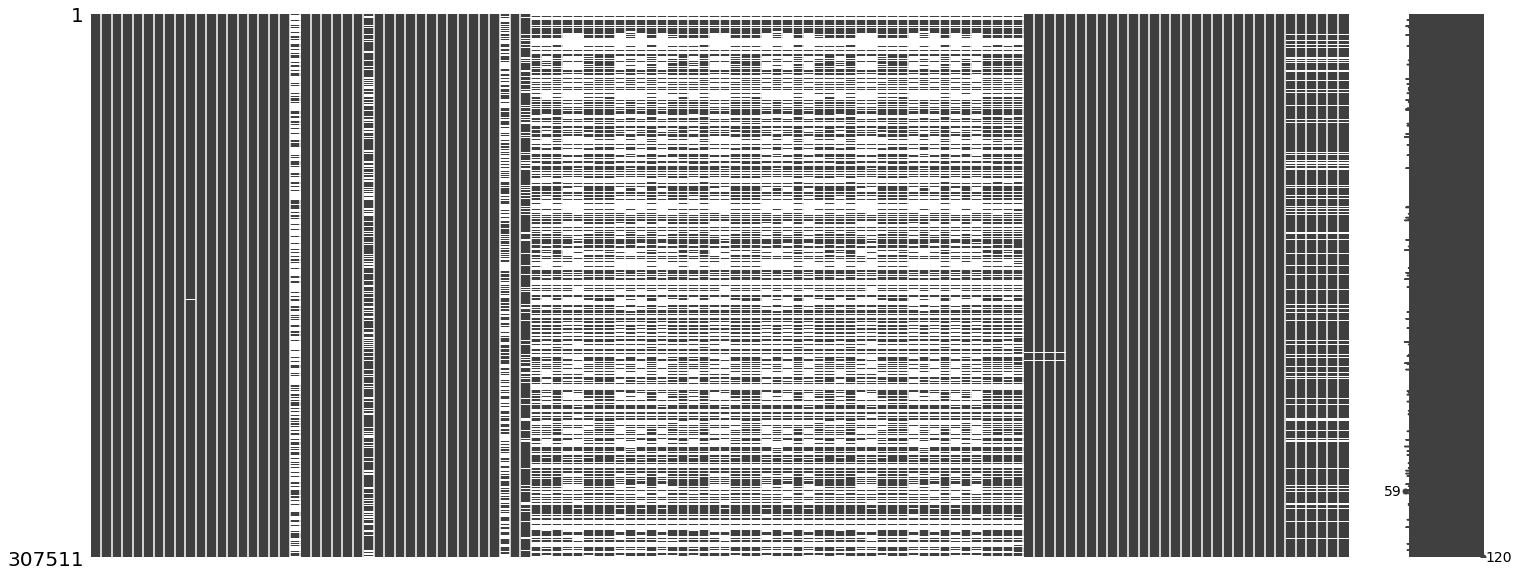

In [39]:
import missingno as msno
plt.figure(figsize=(24, 16))
msno.matrix(df_train)
plt.show()

In [40]:
def split_data(df):
  numerical_list = df.select_dtypes(include=['int', 'float']).columns.tolist()
  continuous_list = [col for col in numerical_list if df[col].nunique() >=20]
  discrete_list = [col for col in numerical_list if df[col].nunique() <20]
  categorical_list = df.select_dtypes(include='object').columns.tolist()
  return continuous_list, discrete_list, categorical_list
con_list, dis_list, cat_list= split_data(df_train) 
print(con_list)

['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', '

In [41]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
sgdc = SGDClassifier(loss='log', random_state=42)
lgr = LogisticRegression(random_state = 40)
imputer_mean = SimpleImputer(strategy="mean")
imputer_mostfreq = SimpleImputer(strategy="most_frequent")
stdscaler = StandardScaler()
ohe = OneHotEncoder()
# make pipline
con_pip = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())
dis_pip =  make_pipeline(SimpleImputer(strategy="most_frequent"), StandardScaler())
cat_pip = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder())
preprocessor = make_column_transformer((con_pip,con_list), (dis_pip, dis_list), (cat_pip,cat_list))

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, plot_roc_curve
model1= make_pipeline(preprocessor,  SGDClassifier(loss='log', random_state=42))
X, y = dataset_train.drop('TARGET', axis = 1), dataset_train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
model1.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

ROC score: 0.7430401093185145


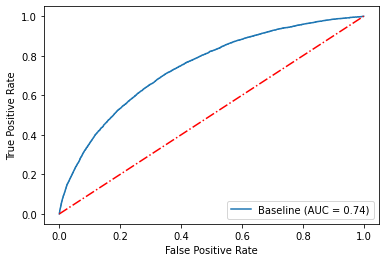

In [47]:
model1.score(X_test, y_test)
y_score = model1.predict_proba(X_test)
score = roc_auc_score(y_test, y_score[:,1])
print("ROC score:", score)
plot_roc_curve(model1, X_test, y_test, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='-.', color='r')
plt.show()

#Problem 3
An ROC score of 0.74 means this model is acceptable at predicting the clients capable of repayment 

In [63]:
test_pred = model1.predict(df_test)
df_pred_out = pd.DataFrame({"SK_ID_CURR": df_test.index,"TARGET": test_pred})
print(df_pred_out.value_counts('TARGET'))
df_pred_out

TARGET
0    48512
1      232
dtype: int64


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0
...,...,...
48739,456221,0
48740,456222,0
48741,456223,0
48742,456224,0


#Problem 4
In this problem i will drop down some features that have high correlation with other features

[['CNT_CHILDREN', 'CNT_FAM_MEMBERS'], ['AMT_CREDIT', 'AMT_ANNUITY'], ['AMT_CREDIT', 'AMT_GOODS_PRICE'], ['AMT_ANNUITY', 'AMT_CREDIT'], ['AMT_ANNUITY', 'AMT_GOODS_PRICE'], ['AMT_GOODS_PRICE', 'AMT_CREDIT'], ['AMT_GOODS_PRICE', 'AMT_ANNUITY'], ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT'], ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY'], ['DAYS_BIRTH', 'DAYS_EMPLOYED'], ['DAYS_BIRTH', 'FLAG_EMP_PHONE'], ['DAYS_BIRTH', 'EXT_SOURCE_1'], ['DAYS_EMPLOYED', 'DAYS_BIRTH'], ['DAYS_EMPLOYED', 'FLAG_EMP_PHONE'], ['DAYS_EMPLOYED', 'FLAG_DOCUMENT_6'], ['FLAG_EMP_PHONE', 'DAYS_BIRTH'], ['FLAG_EMP_PHONE', 'DAYS_EMPLOYED'], ['FLAG_EMP_PHONE', 'FLAG_DOCUMENT_6'], ['CNT_FAM_MEMBERS', 'CNT_CHILDREN'], ['REGION_RATING_CLIENT', 'REGION_POPULATION_RELATIVE'], ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'], ['REGION_RATING_CLIENT_W_CITY', 'REGION_POPULATION_RELATIVE'], ['REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT'], ['REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK

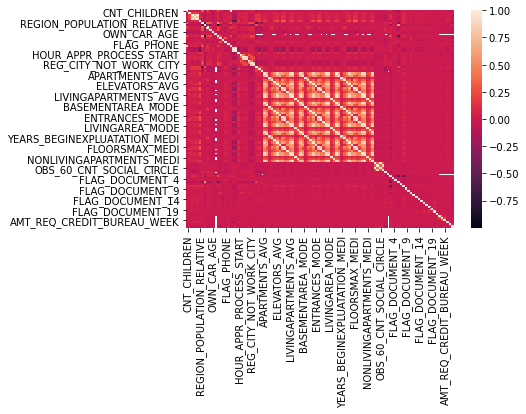

In [72]:
corr = df_train.corr(method = 'pearson')
sns.heatmap(corr)

In [146]:
high_corr=[]
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if (np.abs(corr.iloc[i][j]) > 0.5 and i<j):
      high_corr.append([corr.columns[i],corr.index[j]])
print(high_corr)

[['CNT_CHILDREN', 'CNT_FAM_MEMBERS'], ['AMT_CREDIT', 'AMT_ANNUITY'], ['AMT_CREDIT', 'AMT_GOODS_PRICE'], ['AMT_ANNUITY', 'AMT_GOODS_PRICE'], ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT'], ['REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT_W_CITY'], ['DAYS_BIRTH', 'DAYS_EMPLOYED'], ['DAYS_BIRTH', 'FLAG_EMP_PHONE'], ['DAYS_BIRTH', 'EXT_SOURCE_1'], ['DAYS_EMPLOYED', 'FLAG_EMP_PHONE'], ['DAYS_EMPLOYED', 'FLAG_DOCUMENT_6'], ['FLAG_EMP_PHONE', 'FLAG_DOCUMENT_6'], ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY'], ['REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION'], ['REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], ['APARTMENTS_AVG', 'BASEMENTAREA_AVG'], ['APARTMENTS_AVG', 'COMMONAREA_AVG'], ['APARTMENTS_AVG', 'ELEVATORS_AVG'], ['APARTMENTS_AVG', 'ENTRANCES_AVG'], ['APARTMENTS_AVG', 'FLOORSMAX_AVG'], ['APARTMENTS_AVG', 'LIVINGAPARTMENTS_AVG'], ['APARTMENTS_AVG', 'LIVINGAREA_AVG'], ['APARTMENTS_AVG', 'APARTMENTS_MODE'], ['APARTMENTS_AVG', 'BASEMENTAREA_MODE'], ['

In [147]:
df_reduce = df_train
for i in range(corr.shape[0]):
  for j in range(corr.shape[1]):
    if (np.abs(corr.iloc[i][j]) > 0.5 and i<j):
      try:
        x=df_reduce[corr.columns[i]].isnull().sum()
        y=df_reduce[corr.columns[j]].isnull().sum()
        if x >= y:
          df_reduce = df_reduce.drop(columns=[corr.columns[i]])
        else:
          df_reduce = df_reduce.drop(columns=[corr.columns[j]])
      except: 
        continue


In [148]:
print(f'Size of origin data: {df_train.shape}')
print(f'Size of reduce data: {df_reduce.shape}')
show_miss(df_reduce)

Size of origin data: (307511, 120)
Size of reduce data: (307511, 69)
Number of columns contain miss value: 18
                            Miss count  Miss ratio
NAME_CONTRACT_TYPE                   0    0.000000
CODE_GENDER                          0    0.000000
FLAG_OWN_CAR                         0    0.000000
FLAG_OWN_REALTY                      0    0.000000
CNT_CHILDREN                         0    0.000000
...                                ...         ...
AMT_REQ_CREDIT_BUREAU_DAY        41519   13.501631
AMT_REQ_CREDIT_BUREAU_WEEK       41519   13.501631
AMT_REQ_CREDIT_BUREAU_MON        41519   13.501631
AMT_REQ_CREDIT_BUREAU_QRT        41519   13.501631
AMT_REQ_CREDIT_BUREAU_YEAR       41519   13.501631

[69 rows x 2 columns]


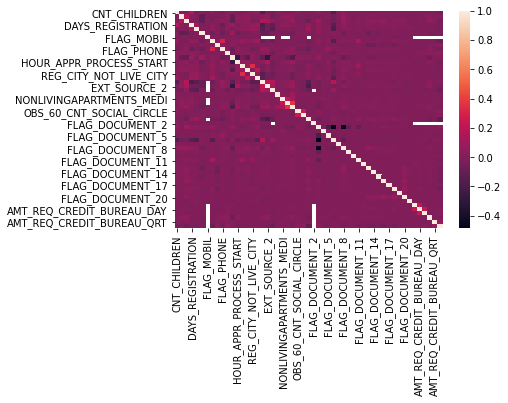

In [149]:

sns.heatmap(df_reduce.corr(method = 'pearson'))

Model 1: SGDClassifier
- Trying SGDClassifier model again with reduce dataset

In [151]:
con_list_re, dis_list_re, cat_list_re= split_data(df_reduce) 
preprocessor2 = make_column_transformer((con_pip,con_list_re), (dis_pip, dis_list_re), (cat_pip,cat_list_re))

In [153]:
model1_re = make_pipeline(preprocessor2, SGDClassifier(loss='log', random_state=42))
y1 = dataset_train['TARGET']
X1_train, X1_test, y1_train, y1_test = train_test_split(df_reduce, y1, test_size=0.25, random_state=42)
model1_re.fit(X1_train, y1_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

Score: 0.9195738702879888
ROC score: 0.7431564765449818


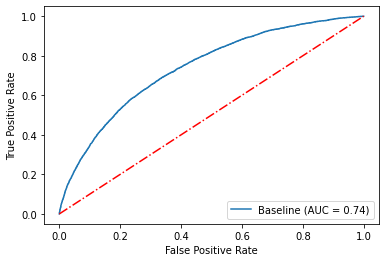

In [157]:
print(f'Score: {model1_re.score(X1_test, y1_test)}')
y_score1 = model1_re.predict_proba(X1_test)
score1 = roc_auc_score(y1_test, y_score1[:,1])
print("ROC score:", score2)
plot_roc_curve(model1_re, X1_test, y1_test, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='-.', color='r')
plt.show()

Model 2:  LinearDiscriminantAnalysis



In [158]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model2 = make_pipeline(preprocessor2,  LinearDiscriminantAnalysis())
y2 = dataset_train['TARGET']
X2_train, X2_test, y2_train, y2_test = train_test_split(df_reduce, y2, test_size=0.25, random_state=42)
model2.fit(X2_train, y2_train)


Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='mean',
                                             

Score: 0.9188064205624495
ROC score: 0.7431794643564352


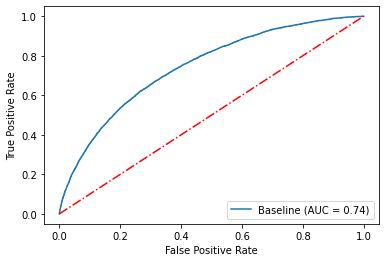

In [160]:
print(f'Score: {model2.score(X2_test, y2_test)}')
y_score2 = model2.predict_proba(X2_test)
score2 = roc_auc_score(y2_test, y_score2[:,1])
print("ROC score:", score2)
plot_roc_curve(model2, X2_test, y2_test, drop_intermediate=False, name="Baseline")
plt.plot([0, 1], [0, 1], linestyle='-.', color='r')
plt.show()